<a href="https://colab.research.google.com/github/belyasminesanaeencg-droid/DS2025/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Lien corrigé
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df = pd.read_csv(link, delimiter=";")

print("\n========= Dataset summary ========= \n")
df.info()

print("\n========= A few first samples ========= \n")
print(df.head())



========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

In [2]:
# Séparation X/Y
X = df.drop("quality", axis=1)
Y = df["quality"]

print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())

# Transformation binaire
Y = np.array([0 if val <=5 else 1 for val in Y])

print("\n========= Classes après binarisation ========= \n")
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))



========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

========= Classes après binarisation ========= 

{np.int64(0): np.int64(1640), np.int64(1): np.int64(3258)}


/tmp/ipython-input-4244014302.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


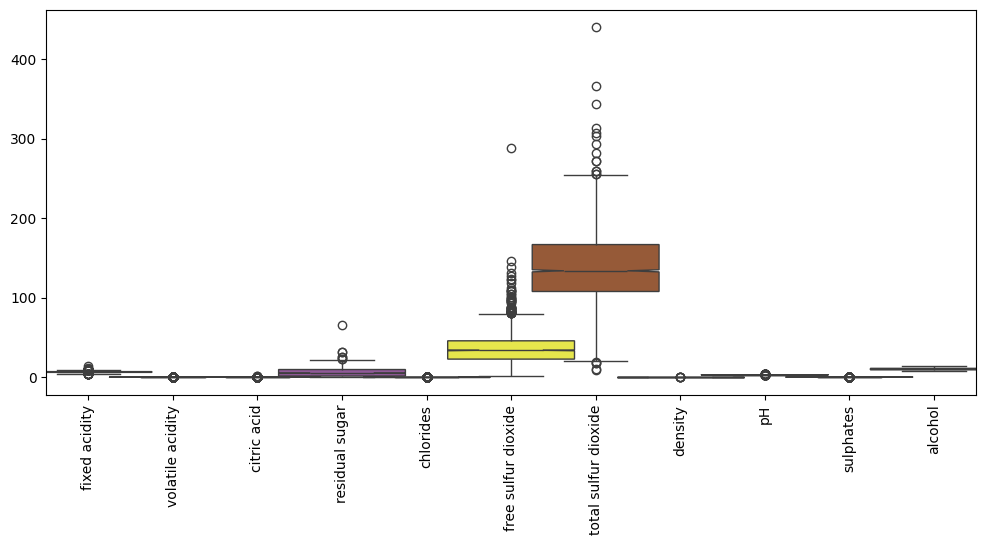

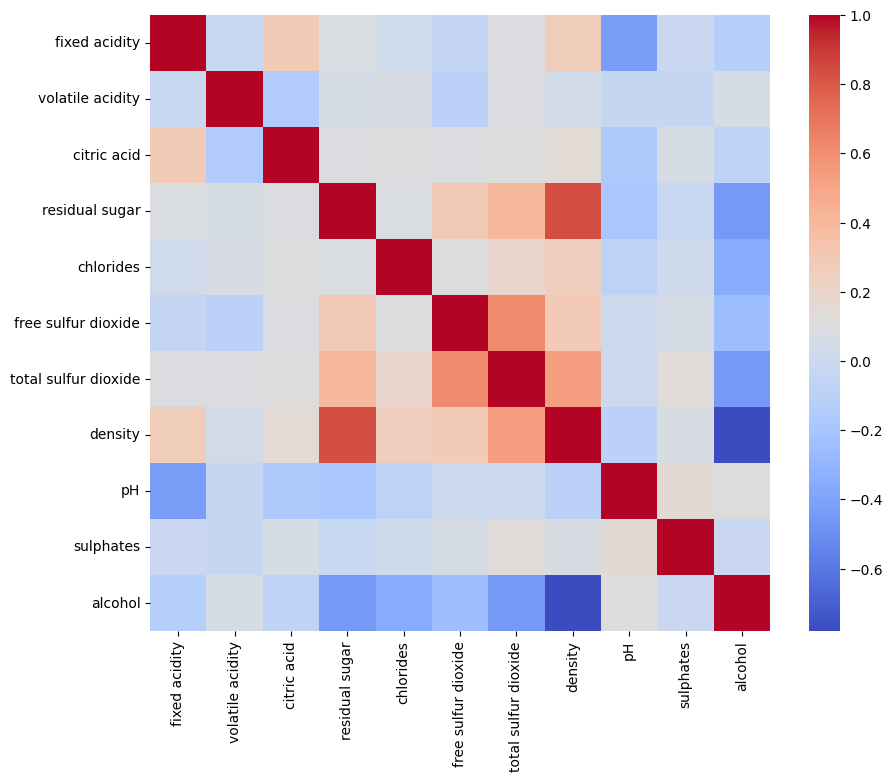

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
ax = plt.gca()
sns.boxplot(data=X, orient="v", palette="Set1", width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10,8))
corr = X.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Split 1 : Train + Test
Xa, Xt, Ya, Yt = train_test_split(
    X, Y, shuffle=True, test_size=1/3, stratify=Y
)

# Split 2 : Train + Validation
Xa, Xv, Ya, Yv = train_test_split(
    Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya
)

print("Taille Train :", Xa.shape)
print("Taille Validation :", Xv.shape)
print("Taille Test :", Xt.shape)


Taille Train : (1632, 11)
Taille Validation : (1633, 11)
Taille Test : (1633, 11)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xa, Ya)

# Prédiction validation
Ypred_v = clf.predict(Xv)

# Erreur validation
error_v = 1 - accuracy_score(Yv, Ypred_v)
print("Erreur validation (k=3) :", error_v)


Erreur validation (k=3) : 0.3392529087568892


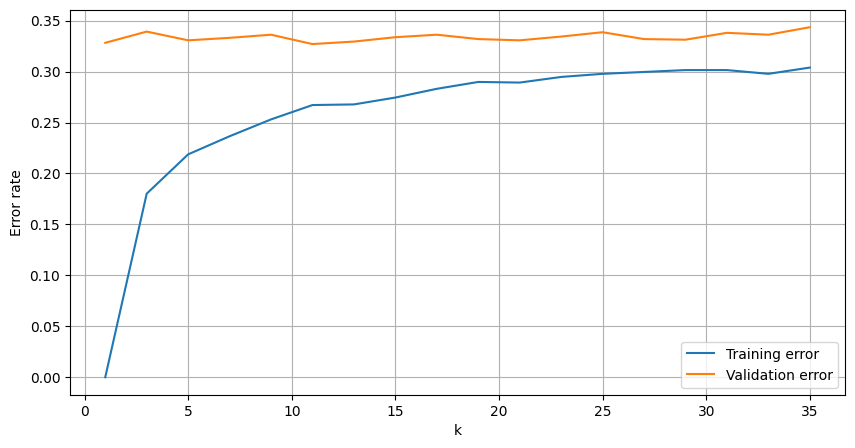

In [6]:
k_vector = np.arange(1, 37, 2)   # 1, 3, 5, ... 35
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # Train
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # Validation
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

# Courbes
plt.figure(figsize=(10,5))
plt.plot(k_vector, error_train, label="Training error")
plt.plot(k_vector, error_val, label="Validation error")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.legend()
plt.grid()
plt.show()


In [7]:
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print("Erreur minimale validation :", err_min)
print("k optimal :", k_star)


Erreur minimale validation : 0.3270055113288426
k optimal : 11


In [8]:
clf = KNeighborsClassifier(n_neighbors=k_star)
clf.fit(Xa, Ya)

Ypred_test = clf.predict(Xt)
error_test = 1 - accuracy_score(Yt, Ypred_test)

print("Erreur sur le test :", error_test)


Erreur sur le test : 0.3190447030006124


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)

Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)   # IMPORTANT : même scaler !


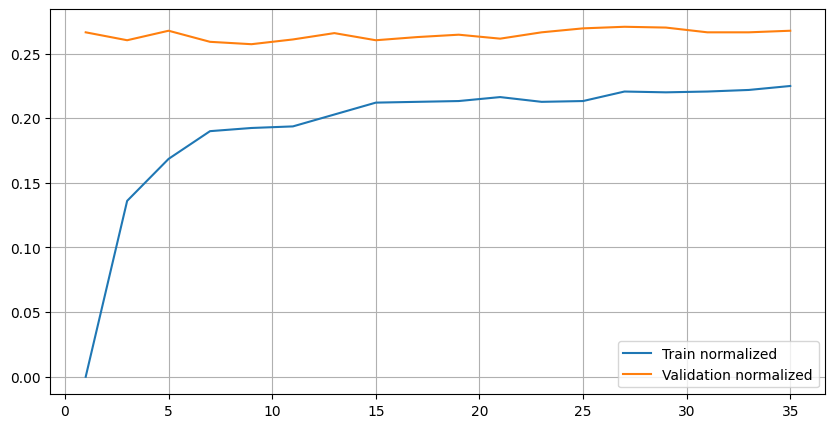

In [10]:
error_train_n = []
error_val_n = []

for k in k_vector:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa_n, Ya)

    # Train
    err_t = 1 - clf.score(Xa_n, Ya)
    error_train_n.append(err_t)

    # Validation
    err_v = 1 - clf.score(Xv_n, Yv)
    error_val_n.append(err_v)

# Courbes
plt.figure(figsize=(10,5))
plt.plot(k_vector, error_train_n, label="Train normalized")
plt.plot(k_vector, error_val_n, label="Validation normalized")
plt.legend()
plt.grid()
plt.show()
